In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')
from gaussxw import gaussxwab

## Ejercicio 3: amplificación de ondas planas ante un obstáculo.

Supongamos que una onda plana de longitud de onda $\lambda$  es bloqueada por una lámina vertical. 

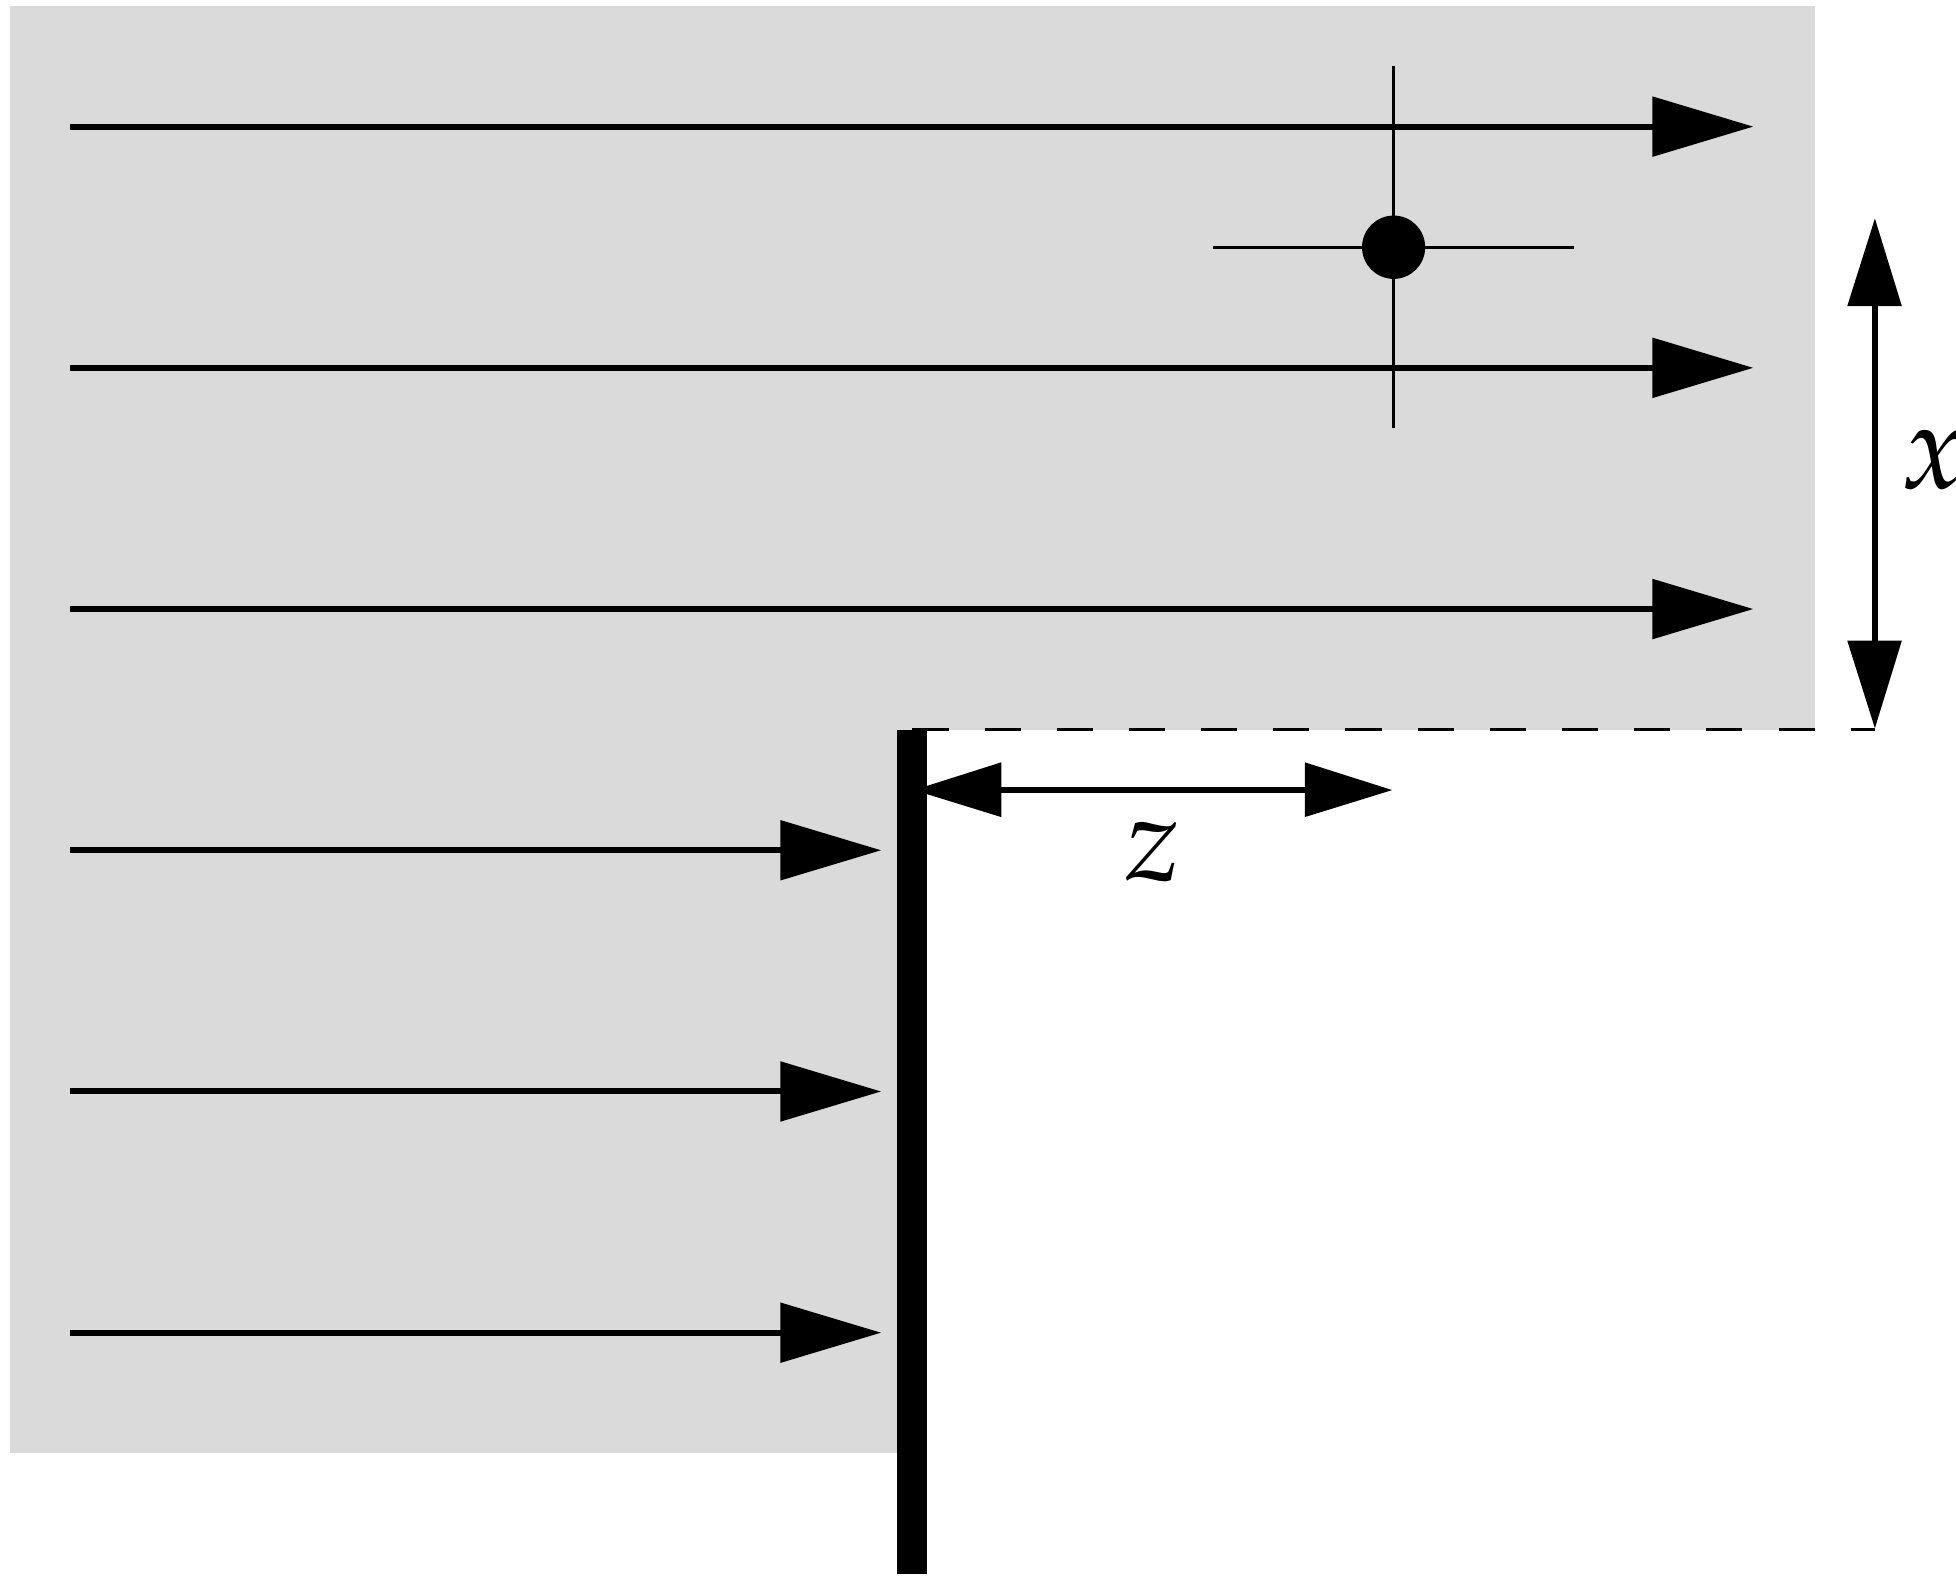

In [2]:
display(Image(filename ="edge.png", width=250, height=50))

En el borde de la lámina la onda se difractará. 

Dado un punto a una distancia $(z,x)$ del borde de la lámina, la intensidad de la onda vendrá dada por:

$$I=\frac{I_0}{8}\left(\left[\,2C(u)+1\,\right]^2+\left[\,2S(u)+1\,\right]^2\right),$$

donde $I_0$ es la intensidad de la luz antes de ser difractada y

$$u=x\sqrt{\frac{2}{\lambda\,z}},\quad C(u)=\int_0^u{\sin\left(\frac{1}{2}\pi\,t^2\right)\text{d}t},\quad S(u)=\int_0^u{\cos\left(\frac{1}{2}\pi\,t^2\right)\text{d}t},$$

Escribir un programa que calcule el cociente $I/I_0$ y lo represente cómo función de la distancia vertical al borde de la lámina $x$ en el rango -5 m a 5 m, para una onda de $\lambda=1$ m, medida a una distancia horizontal de la lámina $z=4$ m.

¿Describir que consecuencias tendría este efecto en el caso de la fuese una onda de sonido en función de la distancia $x$?

---

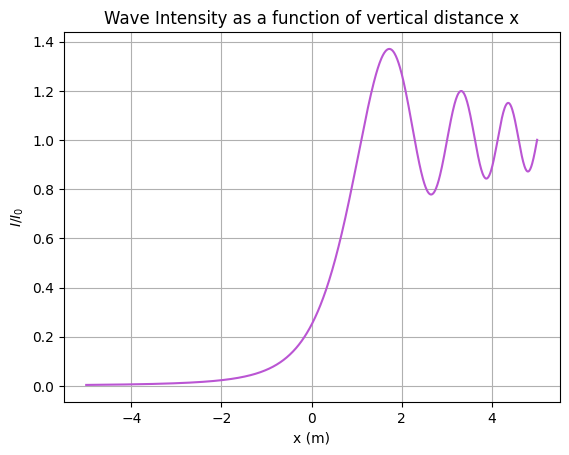

In [3]:
def wave_intensity(x, z, l, N):

    def u(x, z):
        return x*np.sqrt(2/(l*z))
    
    def f(t):
        return np.sin((np.pi*t**2)/2)
    
    def g(t):
        return np.cos((np.pi*t**2)/2)
    
    xg, wg = gaussxwab(N, 0, u(x, z))
    c, s = 0, 0
    for i in range(len(xg)):
        c += wg[i]*f(xg[i])
        s += wg[i]*g(xg[i])

    I = ((2*c + 1)**2 + (2*s + 1)**2)/8

    return I

x = np.linspace(-5, 5, 1000)
y = [wave_intensity(xp, 4, 1, len(x)) for xp in x]

plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.title('Wave Intensity as a function of vertical distance x')
plt.xlabel('x (m)')
plt.ylabel("$I/I_0$")
plt.show()